```
Alexander Baquiax
12007988
```

🔗 🎲 **[Ver en proyecto Streamlit](https://io-project-1.streamlit.app/)** 

## Proyecto #1

Preguntas a responder con la simulación

1. ¿Cuantos juegos son necesarios para que un jugador se quede sin dinero?
2. ¿En cuantos juegos en promedio hay un ganador?
3. ¿Cómo afecta el número de jugadores al número de juegos para que un jugador se gane todo el dinero?
4. Gráfica por jugador de ganancia y pérdida al termino de las simulación

#### Preparación


El codigo pueden encontrarlo en [game.py](game.py)

In [41]:
from game import *

#### Simulación

Asuminos que el número de participantes `N = 10` y que cada uno inicia el juego con `$ 20.00`

1. `¿Cuantos juegos son necesarios para que un jugador se quede sin dinero?`

Simularemos hasta que uno de los jugadores se quede sin dinero.

In [35]:
total_spins = 0
total_games = 500
players = 5
initial_money = 5.0

for i in range(total_games):
    spinner = SpinnerGame(players=players, initial_momeny=initial_money)

    while spinner.first_broken is None:
        total_spins += 1
        spinner.spin()

average = total_spins / total_games

print(f"Average spins to get a first player broken: {average}\n")

Average spins to get a first player broken: 17.732



2. `¿En cuantos juegos en promedio hay un ganador?`

Simularemos hasta una persona sea la única con dinero.

In [8]:
total_spins = 0
total_games = 500
players = 5
initial_money = 5.0

for i in range(total_games):
    spinner = SpinnerGame(players=players, initial_momeny=initial_money)

    while spinner.winner is None:
        total_spins += 1
        spinner.spin()

average = total_spins / total_games

print(f"Average spins to get a winner: {average}\n")

Average spins to get a winner: 119.698



3. `¿Cómo afecta el número de jugadores al número de juegos para que un jugador se gane todo el dinero?`

In [9]:
max_players = 20

total_games = 250
initial_money = 5.0

total_spins = 0

spins_to_win = []

for i in range(2, max_players + 1):
    avg_spins = 0
    for _ in range(total_games):
        spinner = SpinnerGame(players=i, initial_momeny=initial_money)

        while spinner.winner is None:
            spinner.spin()
        
        avg_spins += spinner.spins
    
    avg_spins /= total_games
    
    spins_to_win.append(avg_spins)

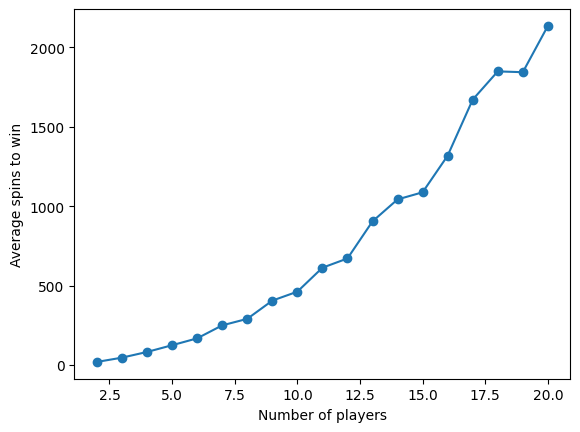

In [36]:
plt.plot(range(2, max_players + 1), spins_to_win)
plt.scatter(range(2, max_players + 1), spins_to_win)
plt.xlabel("Number of players")
plt.ylabel("Average spins to win")
plt.show()

Observando las gráficas, pareciera ser que el impacto es exponencial. 

4. `Gráfica por jugador de ganancia y pérdida al termino de la simulación`

Winner: player #7, with $44.0


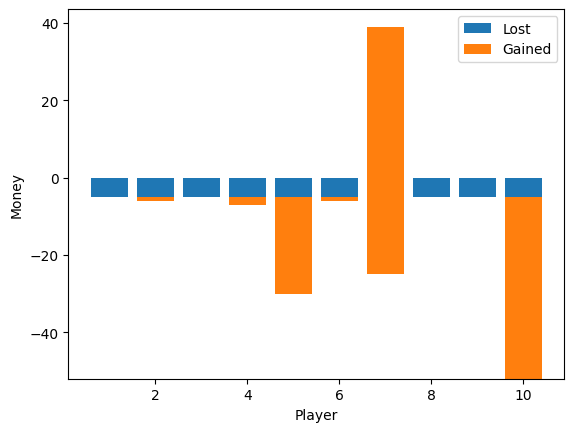

In [40]:
players = 10
initial_money = 5.0


spinner = SpinnerGame(players=players, initial_momeny=initial_money)

while spinner.winner is None:
    spinner.spin()


print(f"Winner: player #{spinner.winner.name}, with ${spinner.winner.money}")


## Plot lost and gained money per player
lost = []
gained = []
for player in spinner.all_players:
    lost.append(player.lost)
    gained.append(player.gained)


lost_bar =plt.bar(range(1, players + 1), lost, label="Lost")
gained_bar = plt.bar(range(1, players + 1), gained, bottom=lost, label="Gained")

plt.xlabel("Player")
plt.ylabel("Money")
plt.legend()
plt.show()
